In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as st
import pprint as pprint

In [132]:
# Read home value data

data_path_home_value = "Data/home_value_interpolated.csv"
home_value_df = pd.read_csv(data_path_home_value, index_col=0)
home_value_df.head()

,Year,Month,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Interpolated
Date,,,,,,,,,,,,,,,,,,,,,
2004-01,2004,1,161415.797093,112468.897763,187235.313336,166981.743111,101330.145359,320965.660495,222891.848203,240366.466568,...,122685.992092,120843.533394,180548.766033,159287.338362,177558.177299,212860.778161,86900.603167,150926.440573,154013.426255,NaN
2004-02,2004,2,162463.870016,112725.088423,187841.549097,167847.418906,101783.232071,325732.847350,223182.101684,242095.673819,...,123007.298345,121661.051633,180839.208311,160645.635537,179308.464022,214128.636011,87419.094513,151705.824485,154493.152088,NaN
2004-03,2004,3,163620.161222,113012.039266,188271.790840,168900.513316,102304.179582,331170.356031,223520.345262,243749.324603,...,123363.249017,122955.182386,181171.778189,162105.970945,181345.555866,215461.768858,88034.036663,152507.819145,155126.857142,NaN
2004-04,2004,4,164912.797589,113305.182222,189382.536002,170180.251404,102880.788798,337412.489527,224019.582683,245757.604398,...,123763.276144,124239.434257,181569.731315,163691.500174,183784.251765,217005.863589,88581.017025,153457.607735,155979.327633,NaN
2004-05,2004,5,166368.365614,113666.681304,190588.147633,171738.808920,103421.568193,344599.782061,224670.441514,248250.261007,...,124167.724328,125300.686962,181787.254249,165682.582390,186704.735618,218988.123794,89089.913281,154662.247862,157153.052502,NaN


In [133]:
# Read median income data

data_path_median_income = "Data/median_income_formatted.csv"
median_income_df = pd.read_csv(data_path_median_income, index_col=0)
median_income_df.head()

,Year,Month,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
2004-01,2004,1,44330.0,36630.0,55060.0,43850.0,34980.0,49220.0,50890.0,55100.0,...,41110.0,38070.0,41400.0,50870.0,47330.0,51140.0,49920.0,33370.0,45730.0,45400.0
2005-01,2005,1,46330.0,37150.0,55890.0,45250.0,36660.0,51760.0,50450.0,56840.0,...,43150.0,39410.0,41420.0,54810.0,50700.0,51910.0,50650.0,36450.0,44650.0,44720.0
2006-01,2006,1,48200.0,37950.0,56420.0,46660.0,37060.0,55320.0,55700.0,62400.0,...,45430.0,40690.0,43310.0,54630.0,51980.0,57120.0,54720.0,38420.0,51690.0,47040.0
2007-01,2007,1,50230.0,42210.0,62990.0,47220.0,40800.0,55730.0,61140.0,64140.0,...,46420.0,41200.0,46050.0,53530.0,47390.0,59160.0,58080.0,42090.0,51280.0,48740.0
2008-01,2008,1,50300.0,44480.0,63990.0,46910.0,39590.0,57010.0,60940.0,64680.0,...,51600.0,39700.0,46490.0,62540.0,50710.0,61990.0,56630.0,37990.0,51200.0,53340.0


In [134]:
# List home_value_df columns, numbered for reference
hv_list = home_value_df.columns.to_list()
hv_colnum = range(0, len(hv_list))
hv_column_pair = pd.DataFrame(zip(hv_colnum, hv_list))
print(hv_column_pair[1])


0                     Year
1                    Month
2            United States
3                  Alabama
4                   Alaska
5                  Arizona
6                 Arkansas
7               California
8                 Colorado
9              Connecticut
10                Delaware
11    District of Columbia
12                 Florida
13                 Georgia
14                  Hawaii
15                   Idaho
16                Illinois
17                 Indiana
18                    Iowa
19                  Kansas
20                Kentucky
21               Louisiana
22                   Maine
23                Maryland
24           Massachusetts
25                Michigan
26               Minnesota
27             Mississippi
28                Missouri
29                 Montana
30                Nebraska
31                  Nevada
32           New Hampshire
33              New Jersey
34              New Mexico
35                New York
36          North Carolina
3

In [135]:
# List median_income_df columns, numbered for reference
inc_list = median_income_df.columns.to_list()
inc_colnum = range(0, len(inc_list))
inc_column_pair = pd.DataFrame(zip(inc_colnum, inc_list))
print(inc_column_pair[1])


0                     Year
1                    Month
2            United States
3                  Alabama
4                   Alaska
5                  Arizona
6                 Arkansas
7               California
8                 Colorado
9              Connecticut
10                Delaware
11    District of Columbia
12                 Florida
13                 Georgia
14                  Hawaii
15                   Idaho
16                Illinois
17                 Indiana
18                    Iowa
19                  Kansas
20                Kentucky
21               Louisiana
22                   Maine
23                Maryland
24           Massachusetts
25                Michigan
26               Minnesota
27             Mississippi
28                Missouri
29                 Montana
30                Nebraska
31                  Nevada
32           New Hampshire
33              New Jersey
34              New Mexico
35                New York
36          North Carolina
3

In [136]:
start_column = hv_column_pair[hv_column_pair == 'Alabama'].first_valid_index()
end_column = hv_column_pair[hv_column_pair == 'Wyoming'].first_valid_index()
print(f"Start Column = {start_column}\nEnd Column = {end_column}")

Start Column = 3
End Column = 53


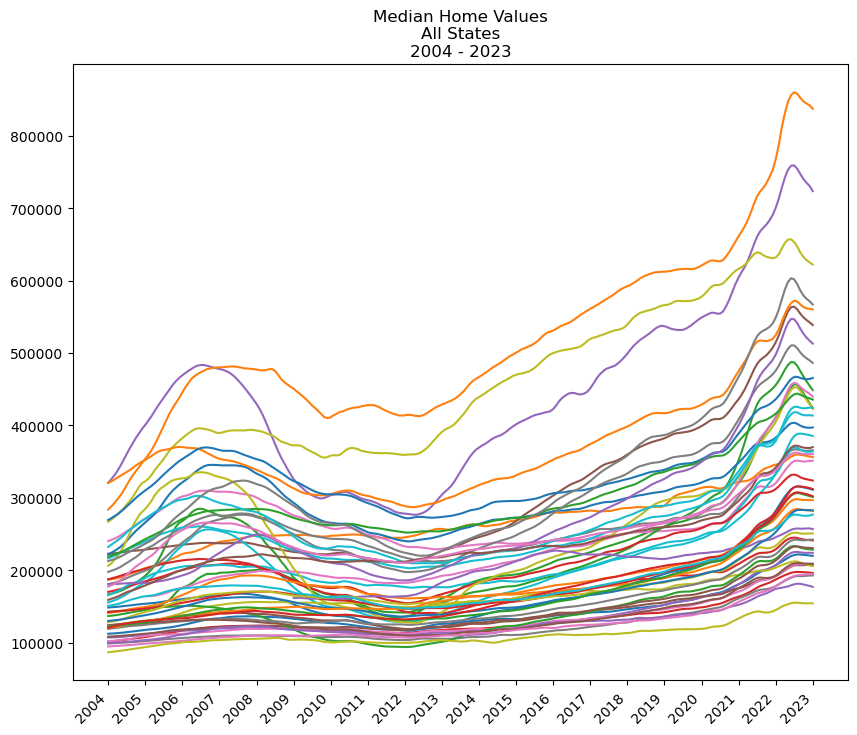

In [137]:
plt.figure(figsize=(10,8))
#home_value_df = home_value_df.set_index('Date')
plt.plot(home_value_df.iloc[:,start_column:end_column])

fig_xticks = range(0, len(home_value_df), 12)
fig_labels = home_value_df['Year'][::12]
plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
plt.title(f"Median Home Values\nAll States\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
plt.show();

In [138]:
#data_path_home_value_interpolated = "Data/home_value_interpolated.csv"
#home_value_interp_df = pd.read_csv(data_path_home_value_interpolated)
#home_value_interp_df = home_value_interp_df.set_index('Date')

In [139]:
# Get the top and bottom 5 states in median home values, as of the end time period
last_data_point_df = home_value_df.iloc[-1,start_column:end_column]
top_5_srs = last_data_point_df.sort_values(ascending=False)[0:5]
top_5_list = top_5_srs.index
print(f"Top 5: {top_5_list}")

bottom_5_srs = last_data_point_df.sort_values(ascending=True)[0:5]
bottom_5_list = bottom_5_srs.index
print(f"Bottom 5: {bottom_5_list}")

Top 5: Index(['Hawaii', 'California', 'District of Columbia', 'Washington',
       'Massachusetts'],
      dtype='object')
Bottom 5: Index(['West Virginia', 'Mississippi', 'Kentucky', 'Oklahoma', 'Arkansas'], dtype='object')


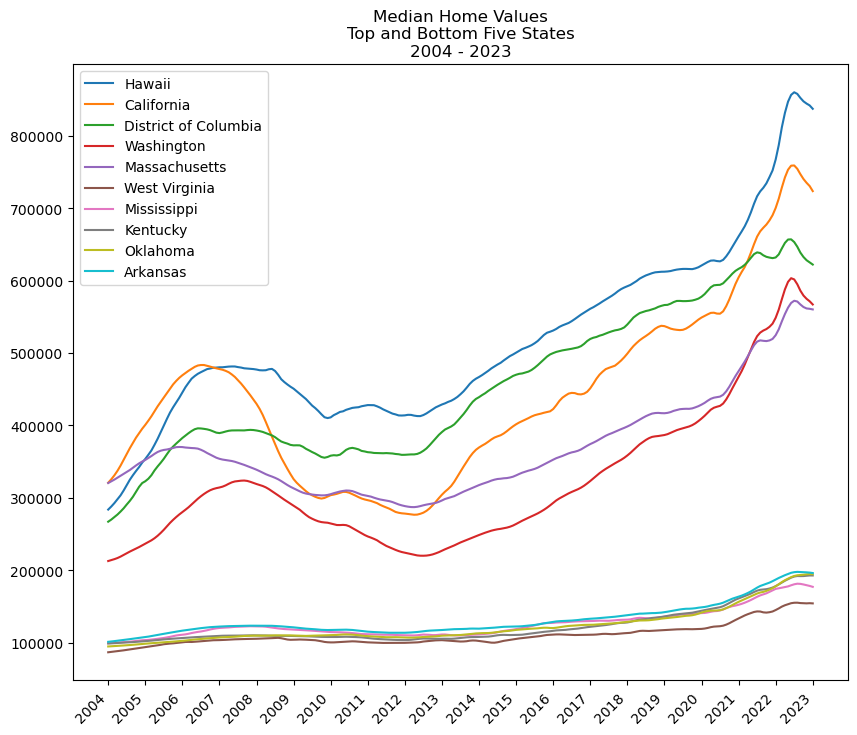

In [140]:
graph_list = top_5_list.append(bottom_5_list)

plt.figure(figsize=(10,8))
fig01 = plt.plot(home_value_df.loc[:,graph_list])
#fig_01a = plt.plot(hv2_df.loc[:,top_5_list])
#fig_01b = plt.plot(hv2_df.loc[:,bottom_5_list])
fig_xticks = range(0, len(home_value_df), 12)
fig_labels = home_value_df['Year'][::12]
plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
plt.legend(graph_list)
#plt.legend([fig_01a, fig_01b], ['Top 5', 'Bottom 5'])
plt.title(f"Median Home Values\nTop and Bottom Five States\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
plt.show();

In [141]:
def graph_home_value_vs_income(state):
    plt.figure(figsize=(10,8))
    fig01, = plt.plot(home_value_df.loc[:,state], label="Median Home Value")
    fig02, = plt.plot(median_income_df.loc[:,state], label="Median Income")
    fig_xticks = range(0, len(home_value_df), 12)
    fig_labels = home_value_df['Year'][::12]
    plt.xticks(fig_xticks, labels=fig_labels, rotation=45, horizontalalignment='right')
    plt.title(f"Median Home Value and Median Income\n{state}\n{fig_labels.iloc[0]} - {fig_labels.iloc[-1]}")
    plt.ylim((0, 900000))
    plt.legend()
    plt.show();

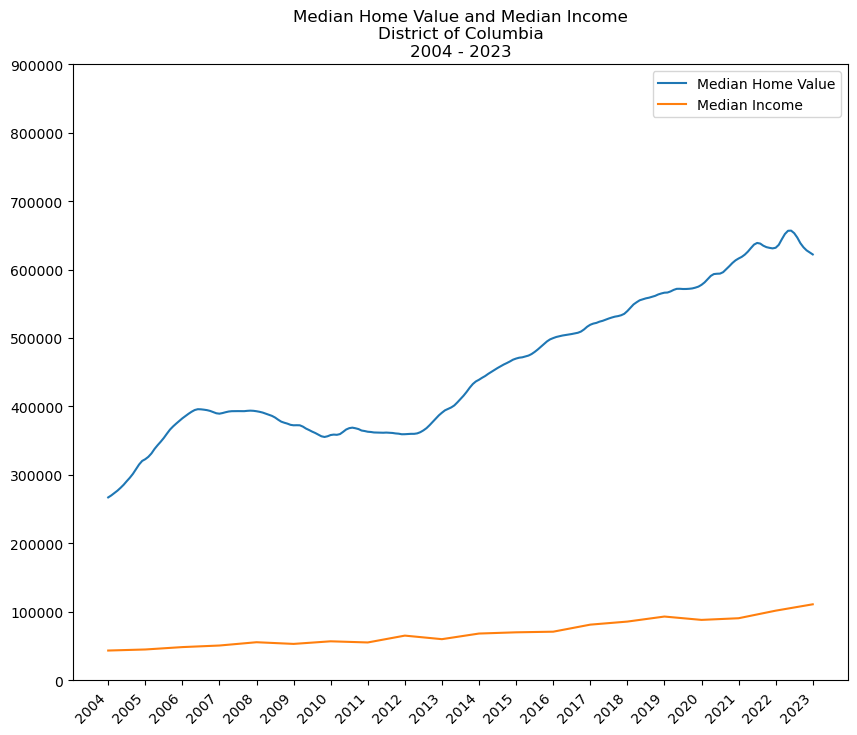

In [142]:
graph_home_value_vs_income("District of Columbia")

In [143]:
# Define a function to create Linear Regression plots
def LinRegressPlot(x_vals, y_vals, txt_loc_tuple, txt_size=16, marker_color='#0485d1', labels=["","",""]):
    plt.scatter(x_vals, y_vals, marker='o', color=marker_color, alpha=1, edgecolors='black')
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_vals, y_vals)

    #print(f"min r: {(slope * x_vals.min().min()) + intercept}")
    #print(f"max r: {(slope * x_vals.max().max()) + intercept}")
    
    r_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
    r_vals = (slope * x_vals) + intercept
    plt.plot(x_vals, r_vals, 'r')
    plt.annotate(r_line, txt_loc_tuple, color='r', size=txt_size)
    plt.title(labels[0])
    plt.xlabel(labels[1])
    plt.ylabel(labels[2])
    
    return rvalue**2

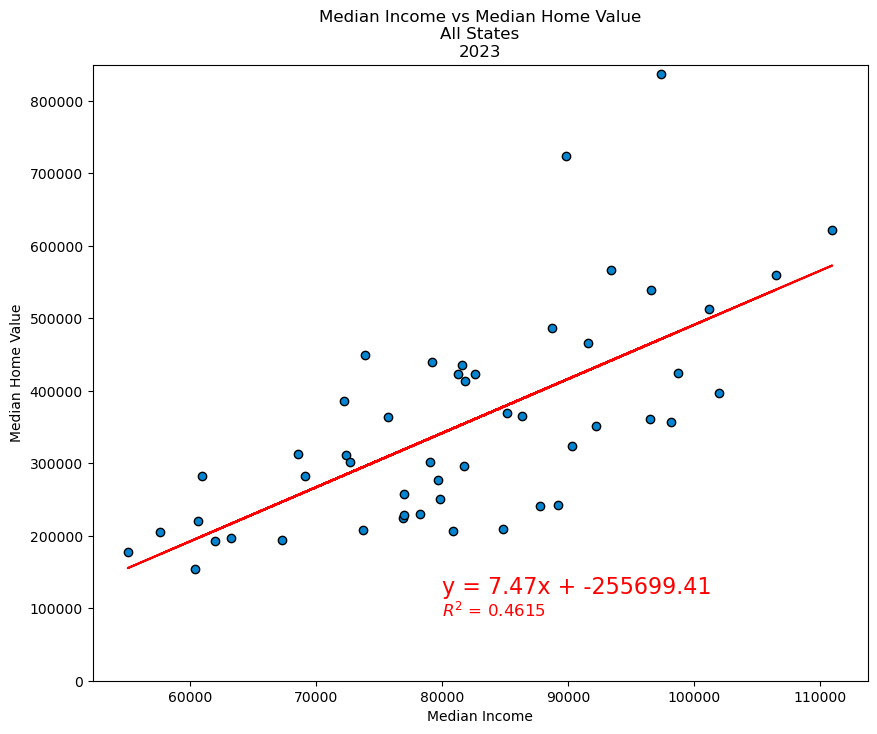

In [158]:
labels = [f"Median Income vs Median Home Value\nAll States\n{home_value_df.iloc[-1,0]}",
          "Median Income",
          "Median Home Value"]

plt.figure(figsize=(10,8))
x_vals = median_income_df.iloc[-1:,start_column:end_column]
y_vals = home_value_df.iloc[-1:,start_column:end_column]

r2 = LinRegressPlot(x_vals.squeeze(), y_vals.squeeze(), (80000,120000), labels=labels)
plt.annotate(f"$R^2$ = {round(r2,4)}", (80000, 90000), color='r', size=12)

plt.ylim(0, 850000)
plt.show();

48
48


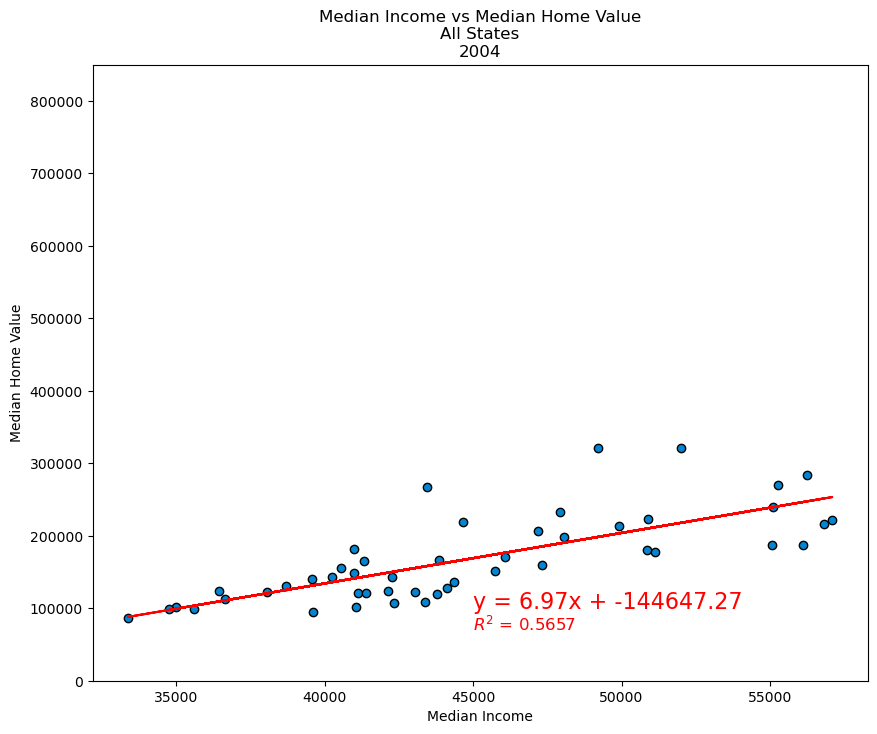

In [ ]:
labels = [f"Median Income vs Median Home Value\nAll States\n{home_value_df.iloc[0,0]}",
          "Median Income",
          "Median Home Value"]

plt.figure(figsize=(10,8))

x_vals = median_income_df.iloc[0:1,start_column:end_column]
y_vals = home_value_df.iloc[0:1,start_column:end_column]

# Drop NA's
drop_list = y_vals.columns[y_vals.isna().any()]
x_vals = x_vals.drop(drop_list, axis=1)
y_vals = y_vals.drop(drop_list, axis=1)

r2 = LinRegressPlot(x_vals.squeeze(), y_vals.squeeze(), (45000,100000), labels=labels)
plt.annotate(f"$R^2$ = {round(r2,4)}", (45000, 70000), color='r', size=12)

plt.ylim(0, 850000)
plt.show();